# Reinforce, Reparametrization Trick and Baseline 

Author: [Evgenii Egorov](mailto:egorov.evgenyy@ya.ru)

This is illustration of the variance of stochastic gradient on the most simple problem:

$$
\min\limits_{\mu}\int \mathcal{N}(x;\mu) x^2 dx
$$

While the problem is simple, it is still thoughtfull example of REINFORCE and Reparametrization Trick estimators.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
def opt_function(mu):
    return 1 + mu ** 2

def reinforce_grad(mu, lmd=0.):
    xi = np.random.randn(1) + mu
    grad = (xi - mu) * (xi**2 + lmd )
    return grad

optimal_reinforce_grad = lambda mu: reinforce_grad(mu, lmd=-(mu**2+3))

def reparam_grad(mu):
    xi = np.random.randn(1)
    grad = 2*(xi + mu)
    return grad

def make_step(mu, grad_f, lr):
    return mu - lr * grad_f(mu)

def several_steps(init, lr, N, grad_f, opt_function):
    mu_h = np.zeros(N)
    f_h = np.zeros(N)
    mu_h[0] = init
    f_h[0] = opt_function(mu_h[0])
    for i in range(1,N): mu_h[i] = make_step(mu_h[i-1], grad_f, lr)
    return mu_h

def make_plots(runs, ax, c):
    K, N = runs.shape   
    for k in range(K): ax.plot(range(N), runs[k,:], alpha=0.25, color=c)
    ax.grid(True)

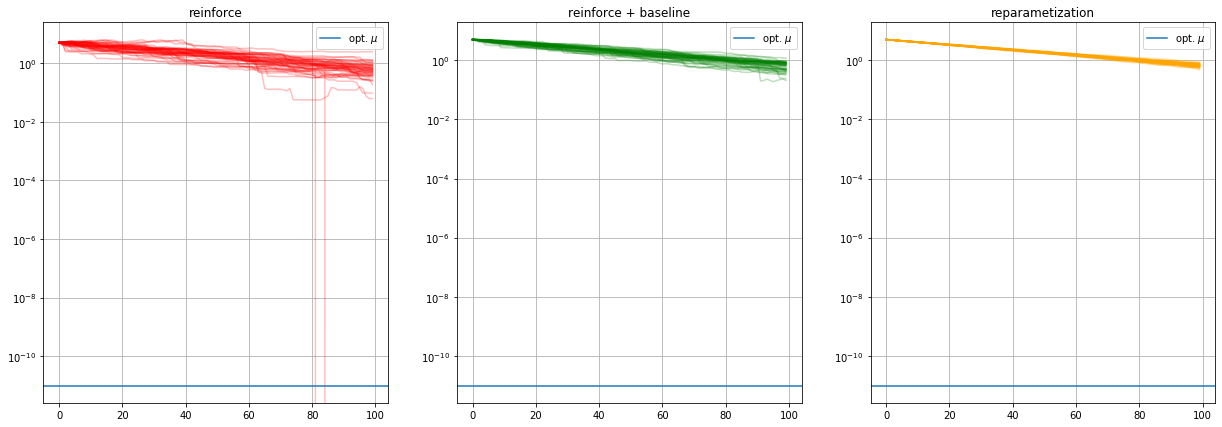

In [56]:
N = 100
K = 50
init = 5
lr = 0.01

runs_reinforce = np.stack([several_steps(init, lr, N, reinforce_grad, opt_function) for i in range(K)])
runs_opt_reinforce = np.stack([several_steps(init, lr, N, optimal_reinforce_grad, opt_function) for i in range(K)])
runs_reparam = np.stack([several_steps(init, lr, N, reparam_grad, opt_function) for i in range(K)])

fig, ax = plt.subplots(1,3, figsize=(21,7), sharex=True)
make_plots(runs_reinforce, ax[0], 'red')
make_plots(runs_opt_reinforce, ax[1], 'green')
make_plots(runs_reparam, ax[2], 'orange')
title = ['reinforce', 'reinforce + baseline', 'reparametization']
for i, tit in zip(ax, title): 
    i.set_title(tit)
    i.axhline(y=1e-11, label='opt. $\mu$')
    i.legend()
    i.set_yscale('log')

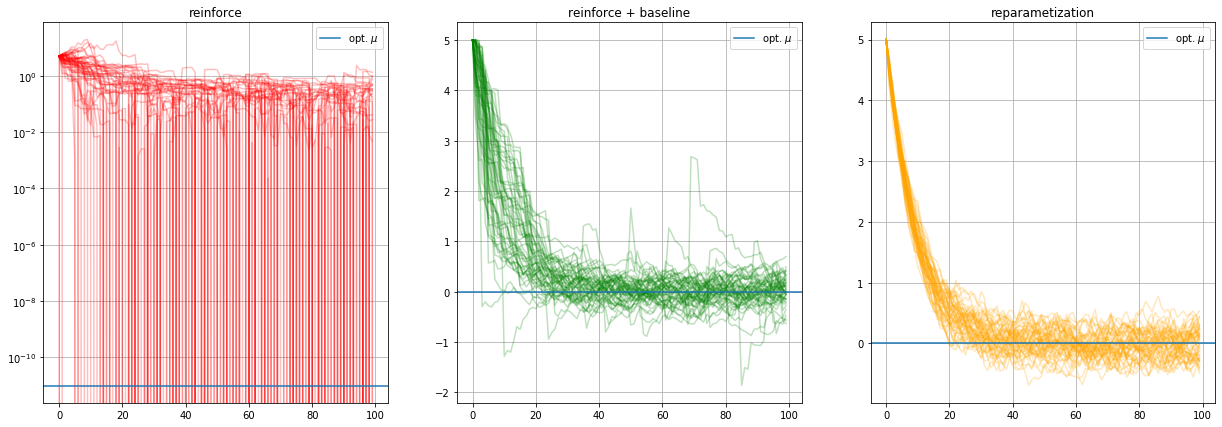

In [54]:
N = 100
K = 50
init = 5
lr = 0.05

runs_reinforce = np.stack([several_steps(init, lr, N, reinforce_grad, opt_function) for i in range(K)])
runs_opt_reinforce = np.stack([several_steps(init, lr, N, optimal_reinforce_grad, opt_function) for i in range(K)])
runs_reparam = np.stack([several_steps(init, lr, N, reparam_grad, opt_function) for i in range(K)])

fig, ax = plt.subplots(1,3, figsize=(21,7), sharex=True)
make_plots(runs_reinforce, ax[0], 'red')
make_plots(runs_opt_reinforce, ax[1], 'green')
make_plots(runs_reparam, ax[2], 'orange')
title = ['reinforce', 'reinforce + baseline', 'reparametization']
for i, tit in zip(ax, title): 
    i.set_title(tit)
    i.axhline(y=1e-11, label='opt. $\mu$')
    i.legend()
ax[0].set_yscale('log')

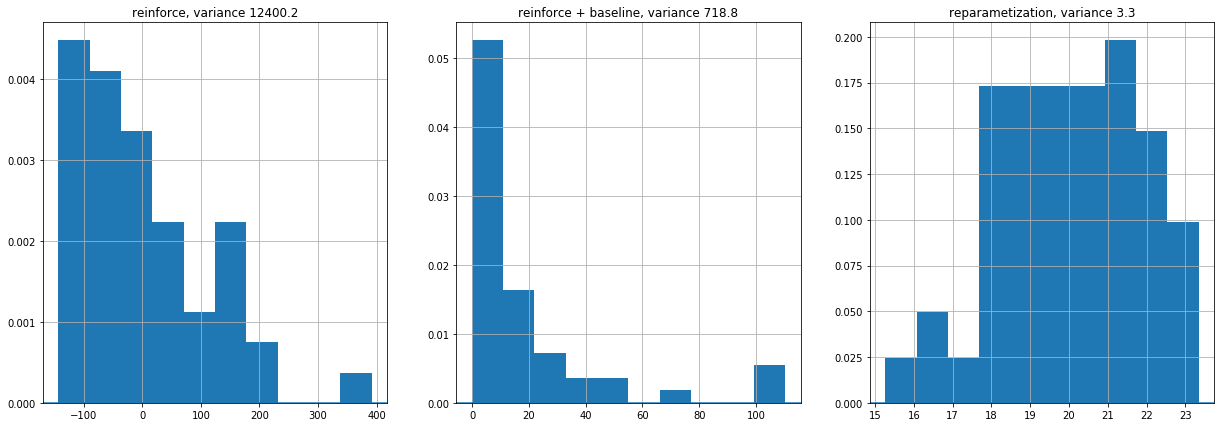

In [43]:
init = 10

fig, ax = plt.subplots(1,3, figsize=(21,7))
reinforce_grad_v = [reinforce_grad(init)[0] for i in range(K)]
reinforce_baseline_grad_v = [optimal_reinforce_grad(init)[0] for i in range(K)]
reperam_grad_v = [reparam_grad(init)[0] for i in range(K)]

title = ['reinforce', 'reinforce + baseline', 'reparametization']
for i, tit, grad in zip(ax, title, [reinforce_grad_v, reinforce_baseline_grad_v, reperam_grad_v]): 
    i.hist(grad, density=True)
    i.set_title('{}, variance {:.1f}'.format(tit, np.var(grad)))
    i.axhline(y=0., label='opt. $\mu$')
    i.grid(True)